In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
data = load_iris()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_scaled)


In [3]:
from sklearn.cluster import KMeans
k = 4
max_iters = 10
mse_list = []
initial_kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1, n_init=1, random_state=42)
initial_kmeans.fit(X_scaled)
centroids = initial_kmeans.cluster_centers_
for i in range(max_iters):
    kmeans = KMeans(n_clusters=k, init=centroids, max_iter=1, n_init=1, random_state=42)
    kmeans.fit(X_scaled)
    centroids = kmeans.cluster_centers_
    mse_list.append(kmeans.inertia_)
mse_list

[5.689496021465533,
 5.568658003704082,
 5.541482535558242,
 5.52576023204097,
 5.52576023204097,
 5.52576023204097,
 5.52576023204097,
 5.52576023204097,
 5.52576023204097,
 5.52576023204097]

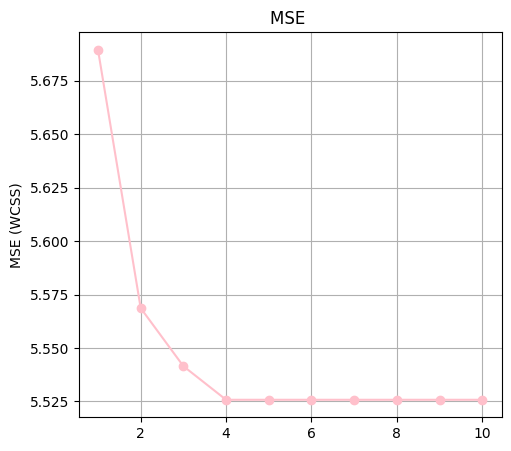

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, max_iters + 1), mse_list, marker='o', color='pink')
plt.title('MSE ')

plt.ylabel('MSE (WCSS)')
plt.grid(True)
ialie


[[ 0.30888923 -0.02003188]
 [-0.61842447  0.06858548]
 [ 0.04086217 -0.2075737 ]
 [ 0.61782031  0.14247591]]


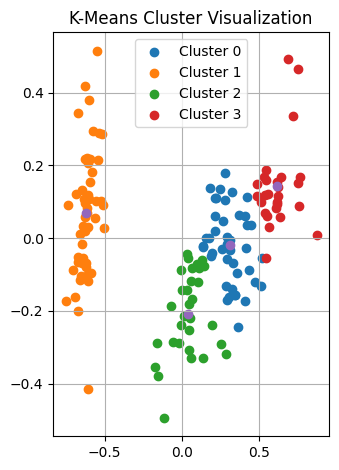

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
clusters = kmeans.predict(X_scaled)
plt.subplot(1, 2, 2)
for cluster in range(k):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
centroids_pca = pca.transform(centroids)
print(centroids_pca )
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1])
plt.title('K-Means Cluster Visualization')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
